# Zeek Network Data to Scikit-Learn
In this notebook we're going to be using the zat Python module and explore the functionality that enables us to easily go from Zeek data to Pandas to Scikit-Learn. Once we get our data in a form that is usable by Scikit-Learn we have a wide array of data analysis and machine learning algorithms at our disposal.

### Software
- zat: https://github.com/SuperCowPowers/zat
- Pandas: https://github.com/pandas-dev/pandas
- Scikit-Learn: http://scikit-learn.org/stable/index.html

### Techniques

- One Hot Encoding: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
- t-SNE: https://distill.pub/2016/misread-tsne/
- Kmeans: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
**Note:** This notebook is a version of notebook provide by Jupiter adapted for our aims 



In [4]:
# Local imports
import zat
from zat.dataframe_to_matrix import DataFrameToMatrix
from zat.log_to_dataframe import LogToDataFrame

# Third Party Imports
import pandas as pd
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

## From Zeek log to Pandas DataFrame

In [5]:
# Create a Pandas dataframe from a Zeek log
log_to_df = LogToDataFrame()
zeek_df = log_to_df.create_dataframe('conn1.log') ##script generated by Zeek while analyzes pcap file about attack (ModBus dataset)

# Print out the head of the dataframe
zeek_df.head(8)

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
ts,,,,,,,,,,,,,,,,,,,,
2023-03-24 08:29:01.027382016,CLxlJE3aqvRqRzQ7gh,fe80::4c50:74ff:fe3d:f004,5353,ff02::fb,5353,udp,dns,NaT,<NA>,<NA>,S0,NaN,NaN,0,D,1,88,0,0,NaN
2023-03-24 08:29:01.027543040,C8mxtyCro941RLXG3,fe80::42:f9ff:fe49:f009,5353,ff02::fb,5353,udp,dns,NaT,<NA>,<NA>,S0,NaN,NaN,0,D,1,88,0,0,NaN
2023-03-24 08:29:01.027612928,CyG95X30x835jhhK14,185.175.0.1,5353,224.0.0.251,5353,udp,dns,NaT,<NA>,<NA>,S0,NaN,NaN,0,D,1,68,0,0,NaN
2023-03-24 08:46:38.507065088,CPYdwQ3ngwbcNrHob,185.175.0.1,5353,224.0.0.251,5353,udp,dns,NaT,<NA>,<NA>,S0,NaN,NaN,0,D,1,73,0,0,NaN
2023-03-24 08:51:02.209745920,CcvILntPtycBuZPPj,fe80::4c50:74ff:fe3d:f004,5353,ff02::fb,5353,udp,dns,NaT,<NA>,<NA>,S0,NaN,NaN,0,D,1,166,0,0,NaN
2023-03-24 08:51:02.209985024,CWvY59UDQqS2H1AG,fe80::42:f9ff:fe49:f009,5353,ff02::fb,5353,udp,dns,NaT,<NA>,<NA>,S0,NaN,NaN,0,D,1,166,0,0,NaN
2023-03-24 08:51:02.210073856,CQfG7A1IQLSrDupRL7,185.175.0.1,5353,224.0.0.251,5353,udp,dns,NaT,<NA>,<NA>,S0,NaN,NaN,0,D,1,146,0,0,NaN
2023-03-24 08:51:20.109189888,CmASHBe9Q94q7iNB5,fe80::4c50:74ff:fe3d:f004,133,ff02::2,134,icmp,NaN,NaT,<NA>,<NA>,OTH,NaN,NaN,0,NaN,1,56,0,0,NaN


## Manipulate dataframe

**Now that we have the data in a dataframe there are a million wonderful things we could do for data munging, processing and analysis but that will have to wait for another time/notebook.**

In [6]:
# Using Pandas we can easily and efficiently compute additional data metrics
# Here we use the vectorized operations of Pandas/Numpy to compute query length
##zeek_df['query_length'] = zeek_df['query'].str.len() ##only for dns

## Conn records are a mix of numeric and categorical data
When we look at the conn records some of the data is numerical and some of it is categorical so we'll need a way of handling both data types in a generalized way. zat has a DataFrameToMatrix class that handles a lot of the details and mechanics of combining numerical and categorical data, we'll use below.

In [7]:
# These are the features we want (note some of these are categorical :)
# features = ['AA', 'RA', 'RD', 'TC', 'Z', 'rejected', 'proto', 'qclass_name', 
#             'qtype_name', 'query_length'] ##dns

features = ['id.resp_p', 'proto', 'orig_ip_bytes', 'conn_state'] ##conn.log

feature_df = zeek_df[features]
feature_df.head()

,id.resp_p,proto,orig_ip_bytes,conn_state
ts,,,,
2023-03-24 08:29:01.027382016,5353,udp,88,S0
2023-03-24 08:29:01.027543040,5353,udp,88,S0
2023-03-24 08:29:01.027612928,5353,udp,68,S0
2023-03-24 08:46:38.507065088,5353,udp,73,S0
2023-03-24 08:51:02.209745920,5353,udp,166,S0


## Transformers


In [8]:
# Use the zat DataframeToMatrix class (handles categorical data)
# You can see below it uses a heuristic to detect category data. When doing
# this for real we should explicitly convert before sending to the transformer.
to_matrix = DataFrameToMatrix()
# to_matrix = dataframe_to_matrix.DataFrameToMatrix() ##other method
zeek_matrix = to_matrix.fit_transform(feature_df)
print(zeek_matrix.shape)

Normalizing column id.resp_p...
Normalizing column orig_ip_bytes...
(412, 9)


## Optional
**This part is an extract of code to find the ideal parameter K for KMeans algorithm**


To do this we use silhouette_score of sklearn

In [9]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
random_state = 42
features1 = ['id.resp_p', 'orig_ip_bytes'] ##conn.log

k_range = list(range(2, 11)) # set the range of k values to test, from 2 to 10 (11-1)
inertias_km = [] # result list that will contain inertias
silhouette_score_km = [] # result list that will contain silhouette_scores
parameters_km = [{'n_clusters': k_range}]
pg_km = list(ParameterGrid(parameters_km))

for i in range(len(pg_km)):
    #print(pg_km[i].get('n_clusters'))
    estimatorKM = KMeans(**(pg_km[i]), random_state = random_state)
    y_km = estimatorKM.fit_predict(zeek_df[features1])

    inertias_km.append(estimatorKM.inertia_)
    silhouette_score_km.append(silhouette_score(zeek_df[features1], y_km))

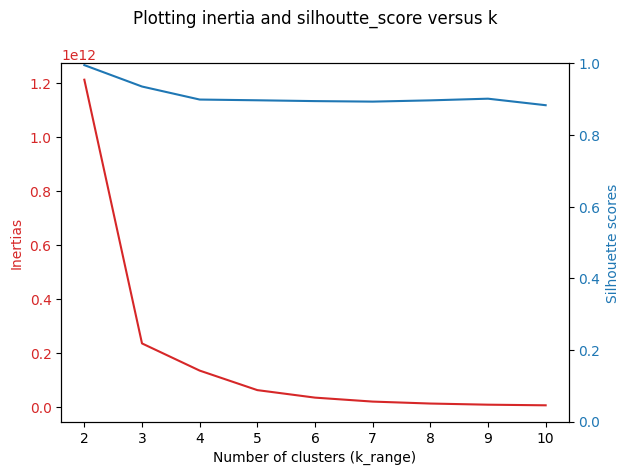

In [10]:
#def two_plots(x, y1, y2, xlabel, y1label, y2label):
fig, ax1 = plt.subplots()
plt.suptitle("Plotting inertia and silhoutte_score versus k")
color = 'tab:red'
ax1.set_xlabel('Number of clusters (k_range)')
ax1.set_ylabel('Inertias', color = color)
ax1.plot(k_range, inertias_km, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color = color) # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_score_km, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)
ax2.set_ylim(0, 1) # the axis for silhouette is [0, 1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#two_plots(x = k_range, y1 = inertias_km, y2 = silhouette_scores_km, xlabel = 'Number of clusters', y1label = 'Inertias', y2label = 'Silhouette scores')


## Scikit-Learn
**Now that we have a numpy ndarray(matrix) we're ready to rock with scikit-learn...**

In [11]:
# Now we're ready for scikit-learn!
# Just some simple stuff for this example, KMeans and TSNE projection
kmeans = KMeans(n_clusters=3).fit_predict(zeek_matrix)
projection = TSNE().fit_transform(zeek_matrix)

# Now we can put our ML results back onto our dataframe!
zeek_df['x'] = projection[:, 0] # Projection X Column
zeek_df['y'] = projection[:, 1] # Projection Y Column
zeek_df['cluster'] = kmeans
zeek_df[['proto', 'orig_ip_bytes', 'conn_state', 'x', 'y', 'cluster']].head()  # Showing the scikit-learn results in our dataframe

,proto,orig_ip_bytes,conn_state,x,y,cluster
ts,,,,,,
2023-03-24 08:29:01.027382016,udp,88,S0,-23.317396,205.882172,0
2023-03-24 08:29:01.027543040,udp,88,S0,-202.605225,310.851410,0
2023-03-24 08:29:01.027612928,udp,68,S0,-260.293732,83.096344,0
2023-03-24 08:46:38.507065088,udp,73,S0,17.774506,-308.710754,0
2023-03-24 08:51:02.209745920,udp,166,S0,127.880188,-117.721733,0


In [12]:
# Plotting defaults
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18.0
plt.rcParams['figure.figsize'] = 15.0, 7.0

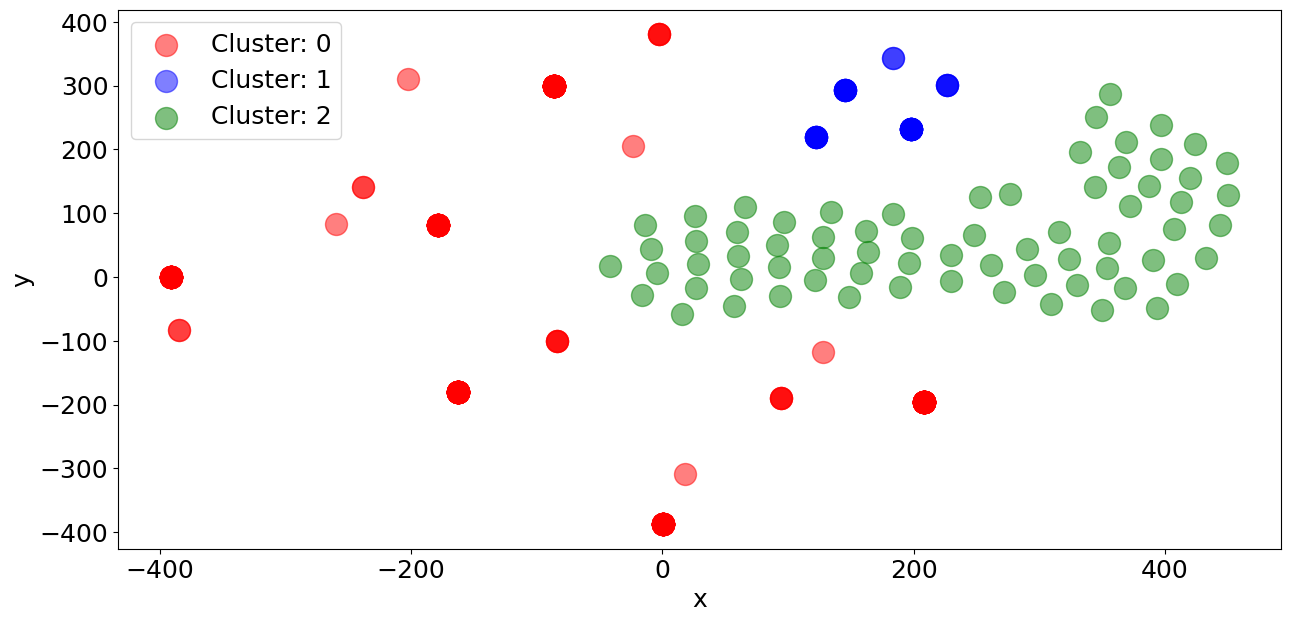

In [13]:
# Now use dataframe group by cluster
cluster_groups = zeek_df.groupby('cluster')

# Plot the Machine Learning results
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'orange', 4:'purple', 5:'black'}
for key, group in cluster_groups:
    group.plot(ax=ax, kind='scatter', x='x', y='y', alpha=0.5, s=250,
               label='Cluster: {:d}'.format(key), color=colors[key])

## Lets Investigate the 3 clusters of Conn data
**We cramed a bunch of features into the clustering algorithm. The features were both numerical and categorical. So did the clustering 'do the right thing'? Well first some caveats and disclaimers:** 

### Cluster details
- Cluster 0: (34 observations) proto = icmp and conn_state = OTH (and the number of bytes send by orig is small)
- Cluster 1: (309 observations) proto = udp and conn_state = SO (and the number of bytes send by orig is small)
- Cluster 2: (69 observations) proto = tcp and conn_state = SF (and the number of bytes send by orig is very large)

## Numerical + Categorical = AOK
With our example data we've successfully gone from Zeek logs to Pandas to scikit-learn. The clusters appear to make sense and certainly from an investigative and threat hunting perspective being able to cluster the data and use PCA for dimensionality reduction might come in handy depending on your use case 

In [14]:
# Now print out the details for each cluster
pd.set_option('display.width', 1000)
show_fields = ['proto', 'orig_ip_bytes', 
            'conn_state',  'cluster']
for key, group in cluster_groups:
    print('\nCluster {:d}: {:d} observations'.format(key, len(group)))
    print(group[show_fields].head())


Cluster 0: 309 observations
                              proto  orig_ip_bytes conn_state  cluster
ts                                                                    
2023-03-24 08:29:01.027382016   udp             88         S0        0
2023-03-24 08:29:01.027543040   udp             88         S0        0
2023-03-24 08:29:01.027612928   udp             68         S0        0
2023-03-24 08:46:38.507065088   udp             73         S0        0
2023-03-24 08:51:02.209745920   udp            166         S0        0

Cluster 1: 34 observations
                              proto  orig_ip_bytes conn_state  cluster
ts                                                                    
2023-03-24 08:51:20.109189888  icmp             56        OTH        1
2023-03-24 09:48:07.981178112  icmp             56        OTH        1
2023-03-24 10:53:40.141177856  icmp             56        OTH        1
2023-03-24 11:48:16.937195008  icmp             56        OTH        1
2023-03-24 12:51:38.